In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [2]:

df = pd.read_excel (r'/Users/jiyeonkim/Documents/food_data_simple.xlsx',header=0)
df


,FOOD COMMODITY GROUP,Food commodity ITEM,Carbon Footprint kg CO2eq/kg or l of food ITEM,Food commodity TYPOLOGY,Carbon Footprint g CO2eq/g o cc of food TYPOLOGY
0,AGRICULTURAL PROCESSED,BEER IN CAN,0.693000,BEER,0.69
1,AGRICULTURAL PROCESSED,BEER IN GLASS,0.960500,BEER,0.69
2,AGRICULTURAL PROCESSED,BEER MODULAR CAN,0.530600,BEER,0.69
3,AGRICULTURAL PROCESSED,CHOCOLATE OR CREAM FILLED COOKIES**,1.533000,BISCUITS,1.47
4,AGRICULTURAL PROCESSED,SIMPLE COOKIES**,1.390750,BISCUITS,1.47
...,...,...,...,...,...
319,FISHING,OCTOPUS,5.800000,SHELLFISH,5.67
320,FISHING,SQUID,6.910000,SHELLFISH,5.67
321,FISHING,PRAWNS/SHRIMPS,7.040000,SHELLFISH,5.67
322,FISHING,OCTOPUS (F),7.878611,SHELLFISH FROZEN,11.47


In [3]:
df.columns
df.columns = df.columns.str.lstrip()
df.set_index('Food commodity ITEM')
df


,FOOD COMMODITY GROUP,Food commodity ITEM,Carbon Footprint kg CO2eq/kg or l of food ITEM,Food commodity TYPOLOGY,Carbon Footprint g CO2eq/g o cc of food TYPOLOGY
0,AGRICULTURAL PROCESSED,BEER IN CAN,0.693000,BEER,0.69
1,AGRICULTURAL PROCESSED,BEER IN GLASS,0.960500,BEER,0.69
2,AGRICULTURAL PROCESSED,BEER MODULAR CAN,0.530600,BEER,0.69
3,AGRICULTURAL PROCESSED,CHOCOLATE OR CREAM FILLED COOKIES**,1.533000,BISCUITS,1.47
4,AGRICULTURAL PROCESSED,SIMPLE COOKIES**,1.390750,BISCUITS,1.47
...,...,...,...,...,...
319,FISHING,OCTOPUS,5.800000,SHELLFISH,5.67
320,FISHING,SQUID,6.910000,SHELLFISH,5.67
321,FISHING,PRAWNS/SHRIMPS,7.040000,SHELLFISH,5.67
322,FISHING,OCTOPUS (F),7.878611,SHELLFISH FROZEN,11.47


In [4]:
typologies = df['Food commodity TYPOLOGY'].unique()

<ipython-input-5-ca3ede785869>:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(11,9))


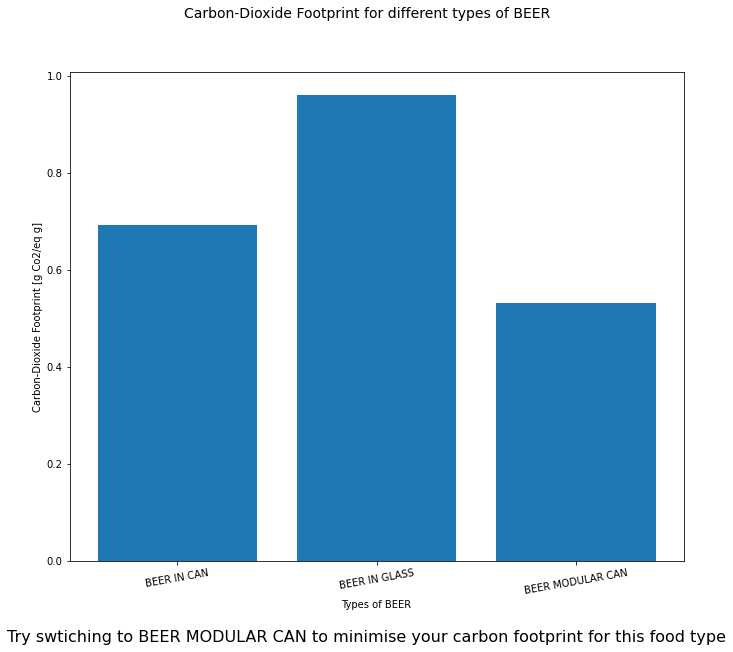

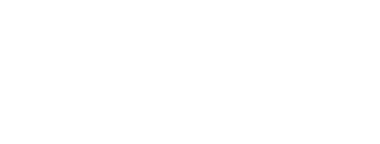

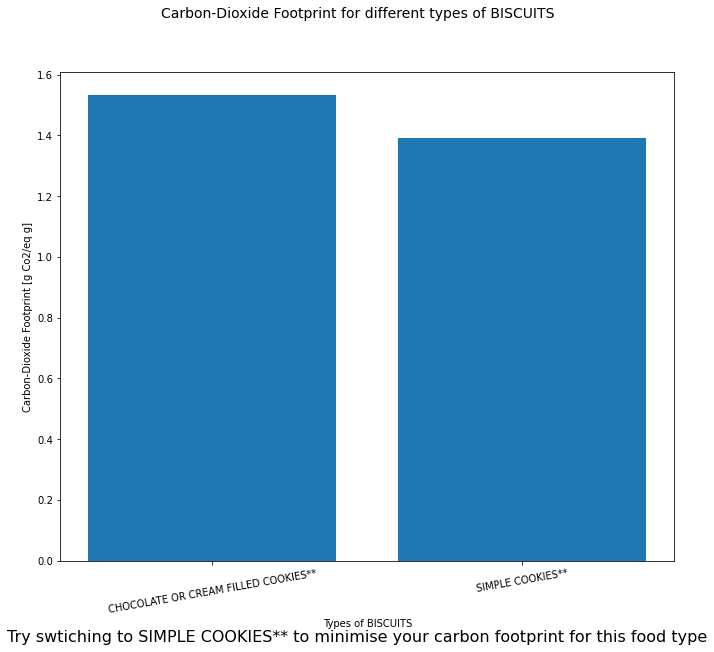

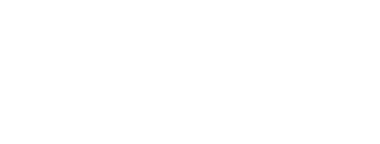

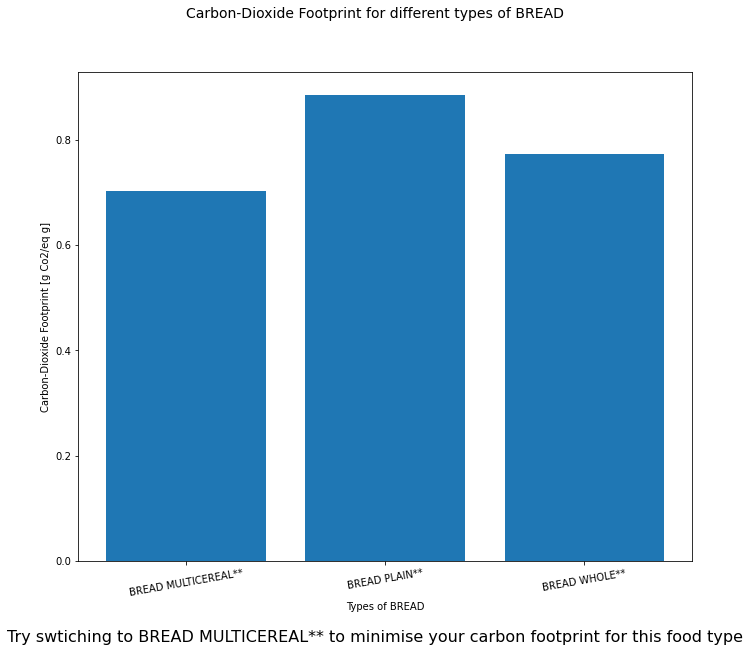

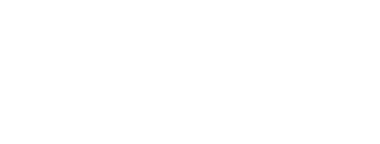

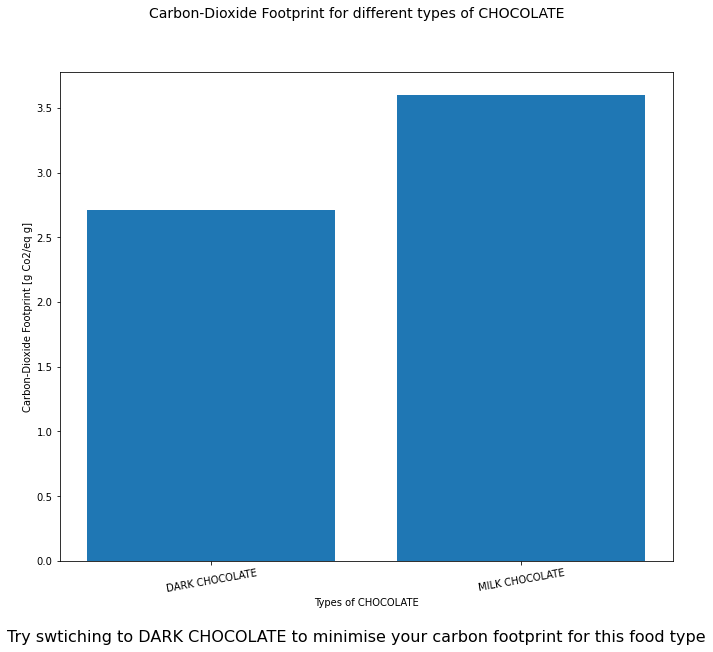

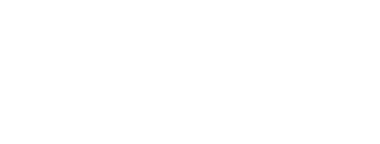

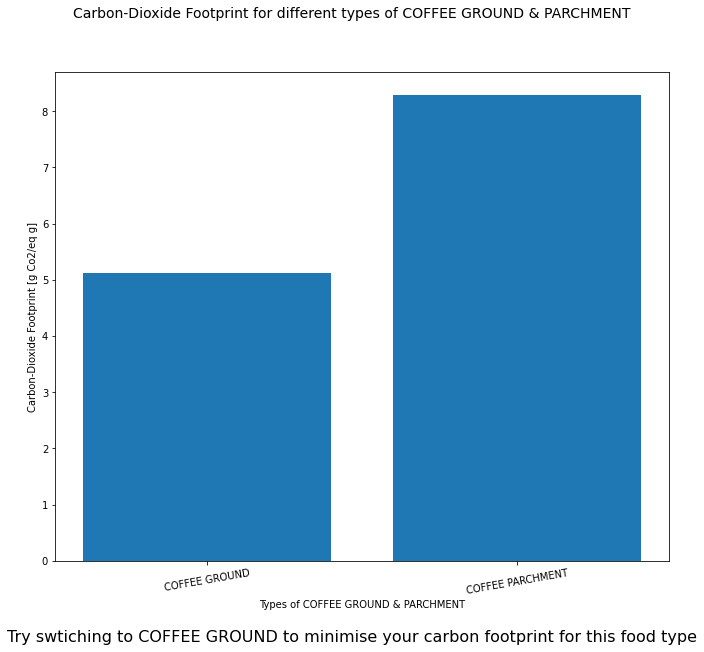

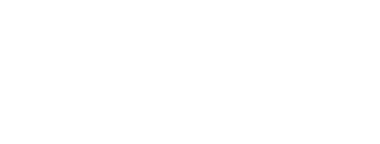

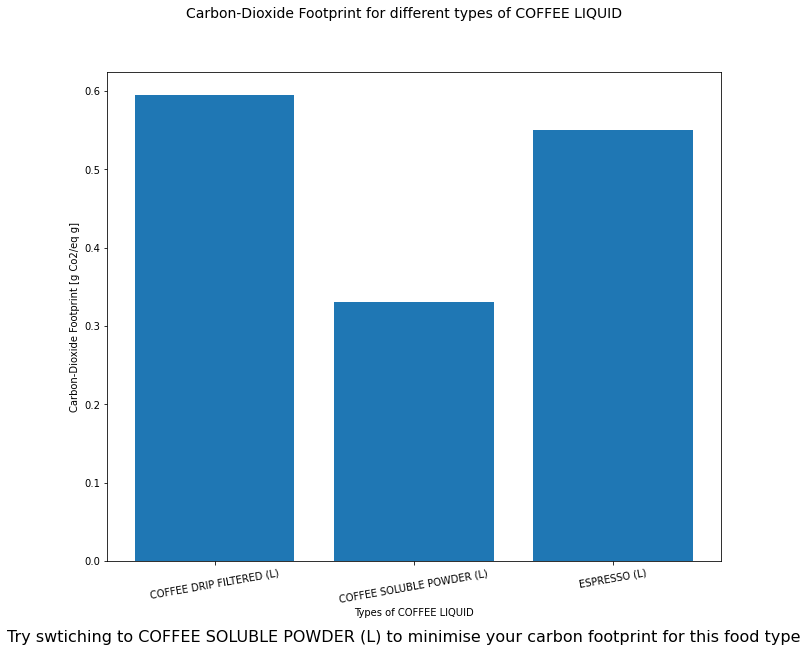

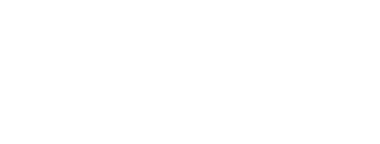

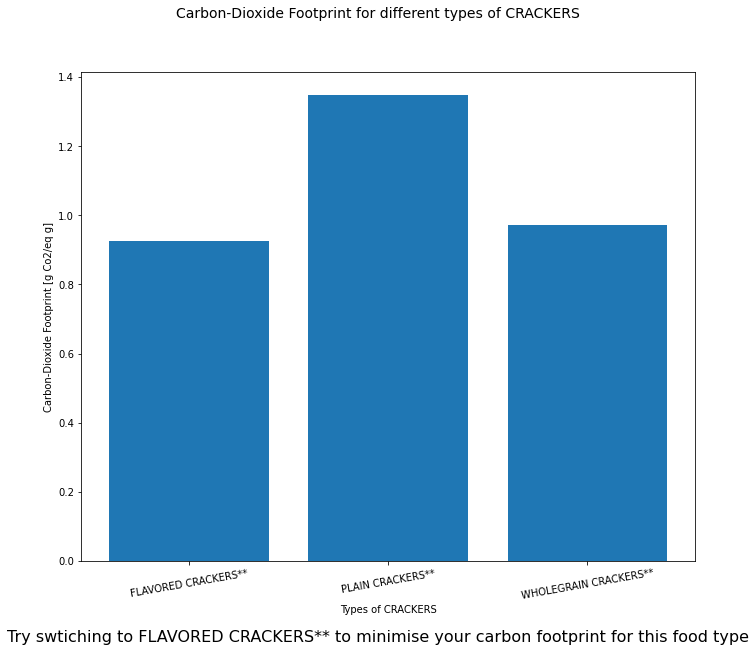

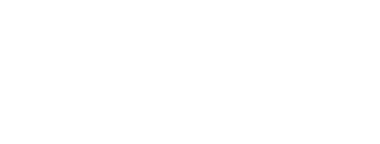

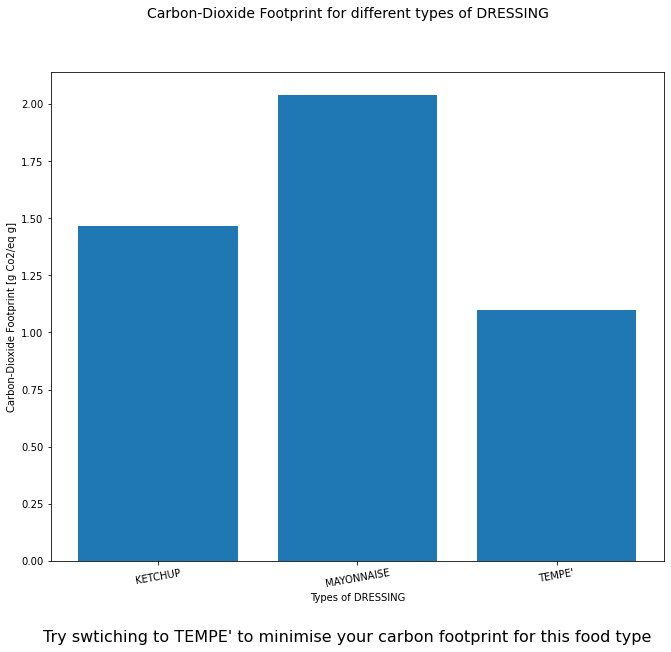

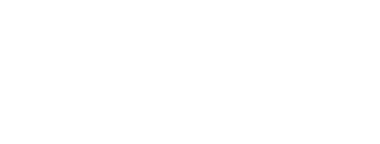

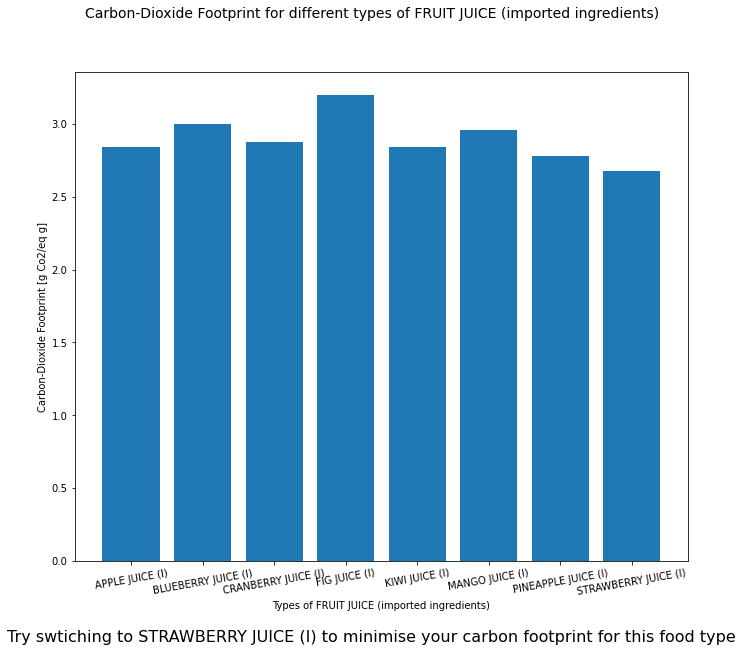

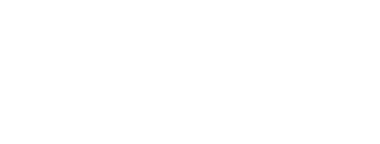

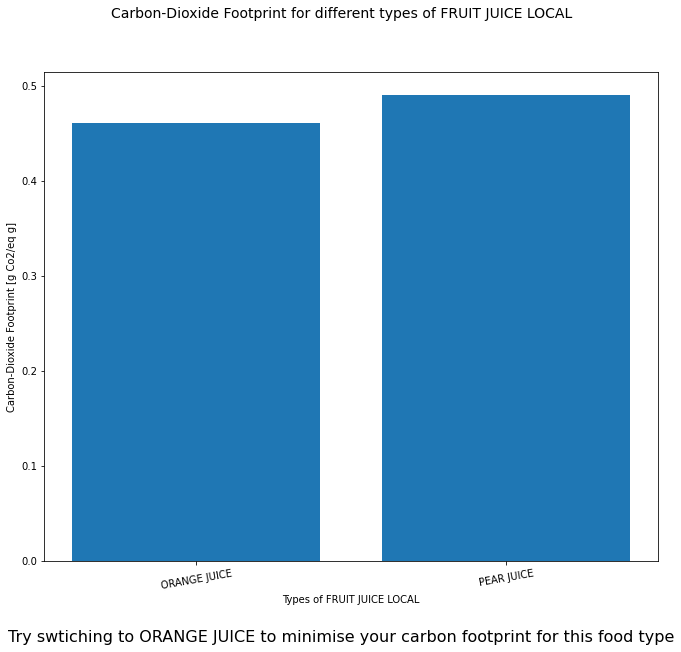

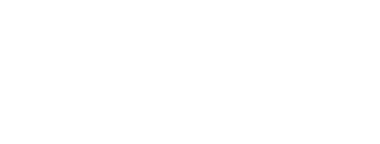

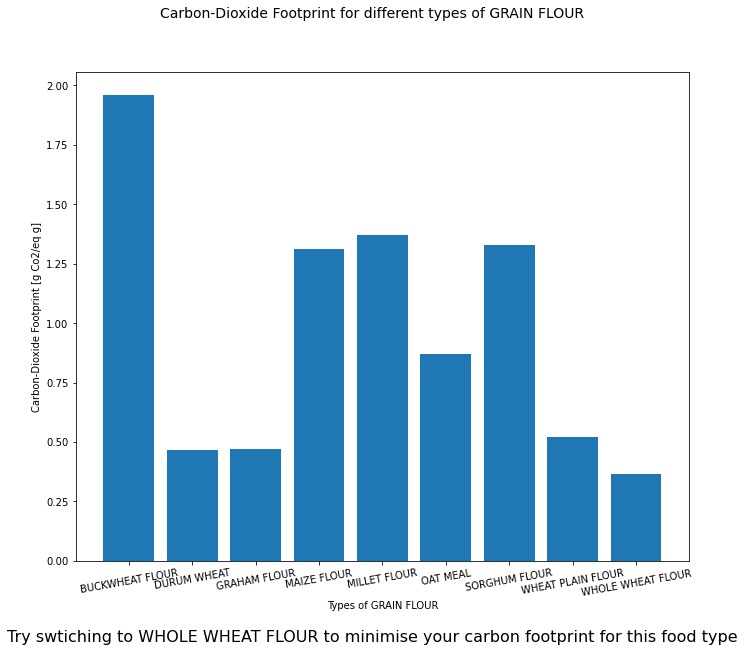

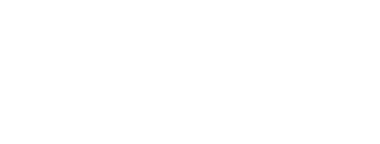

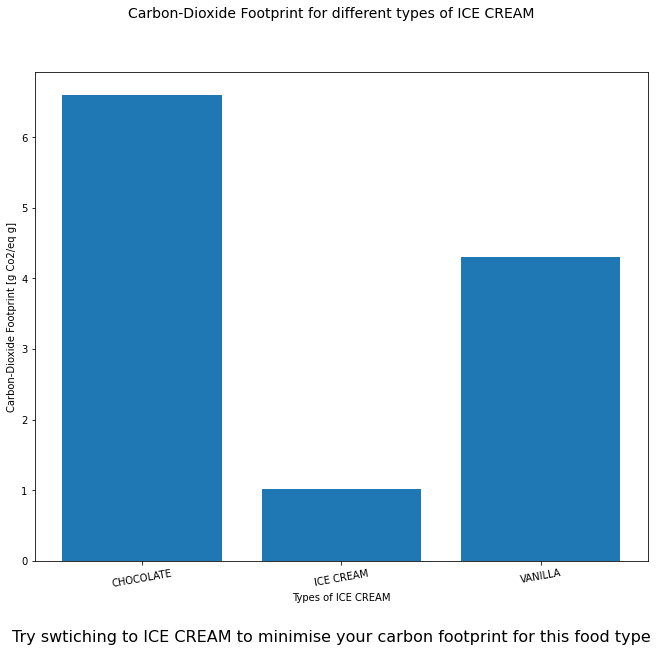

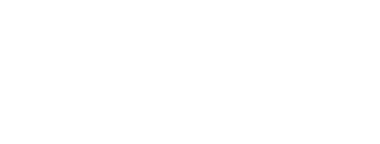

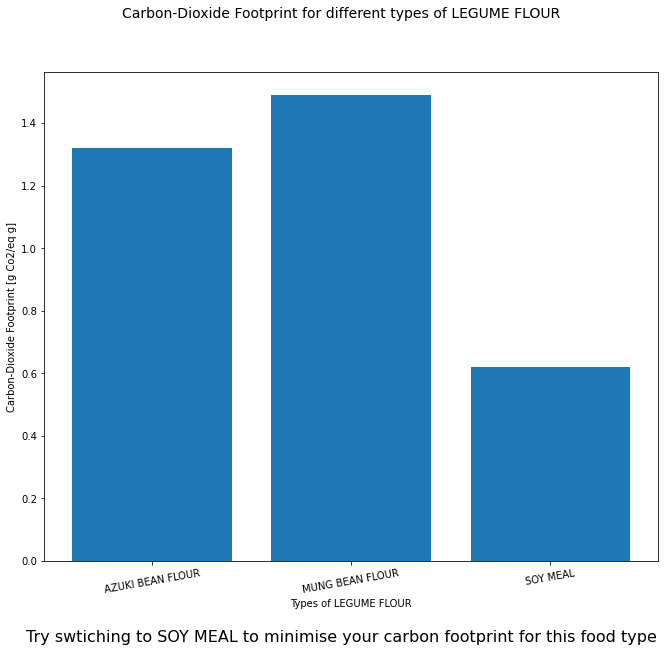

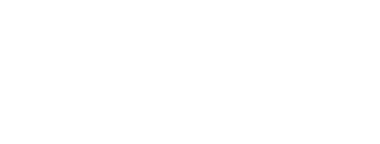

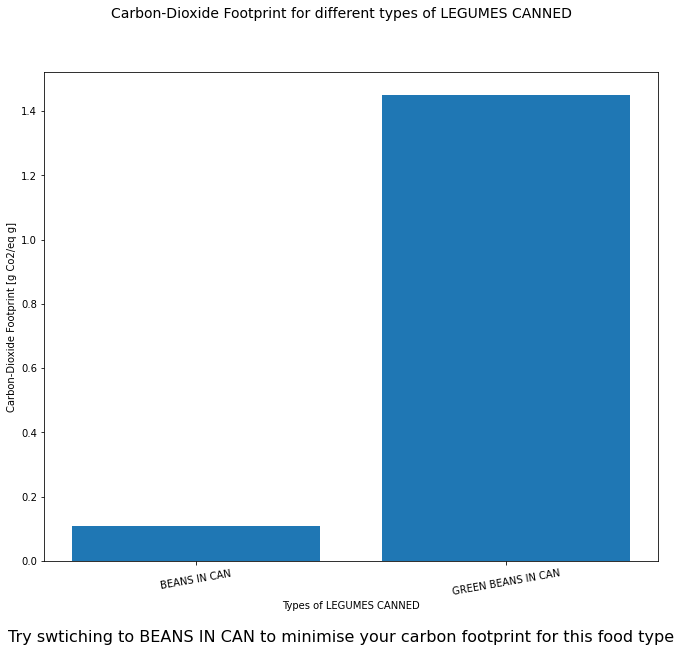

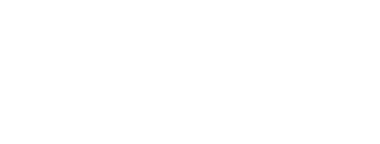

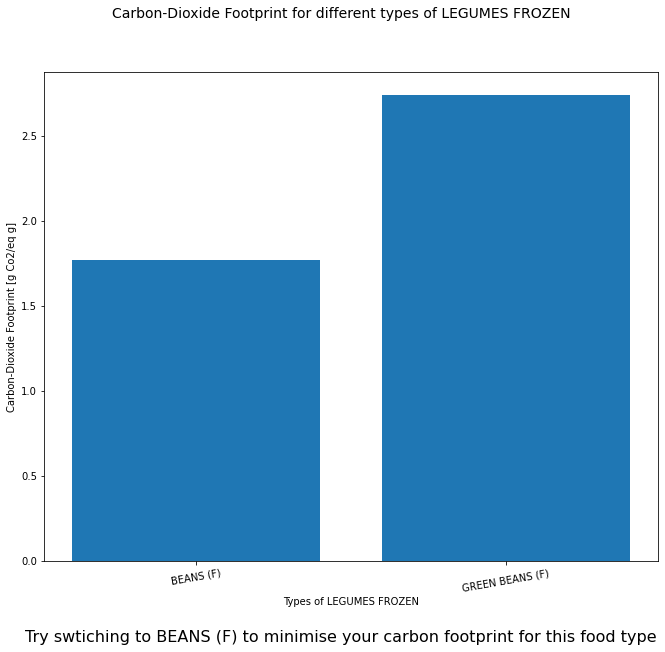

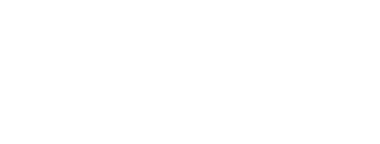

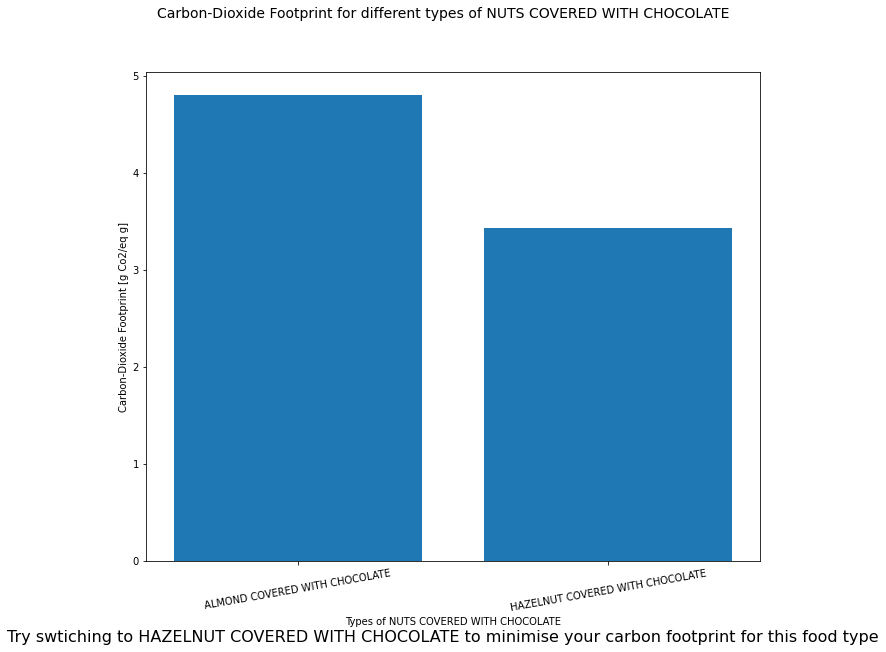

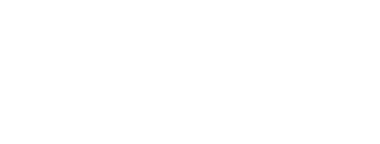

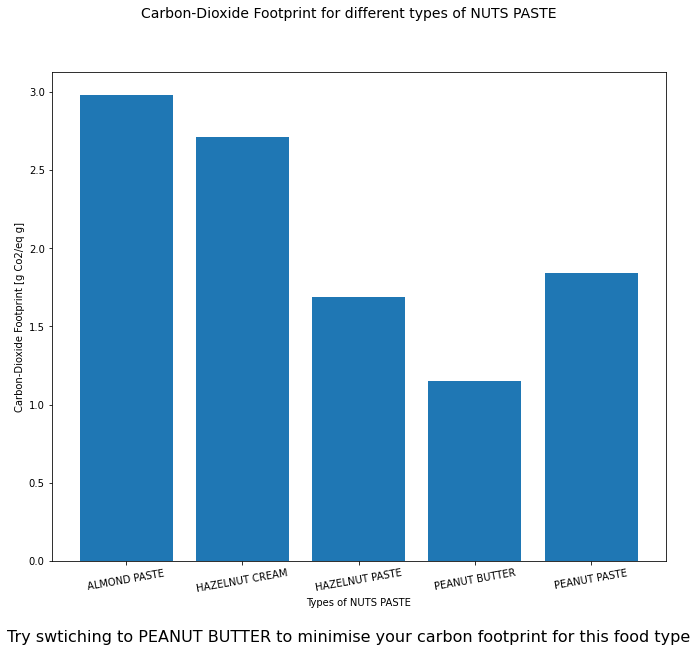

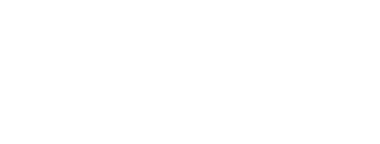

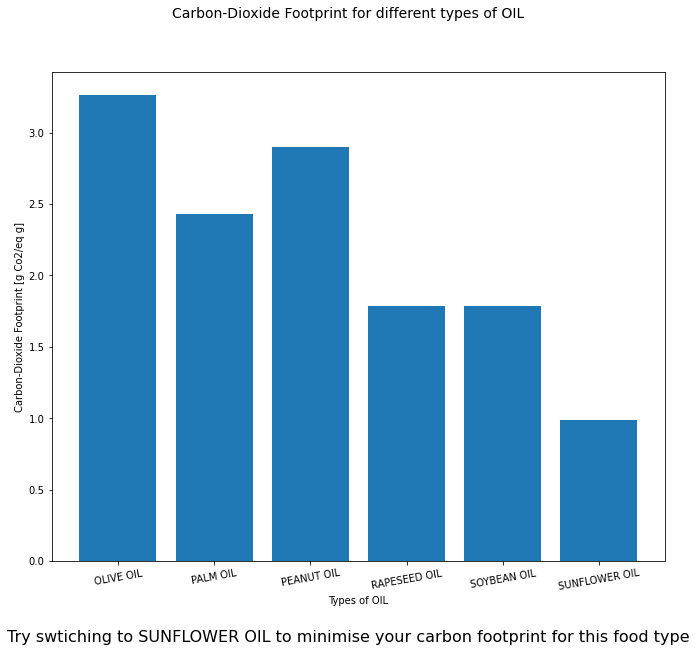

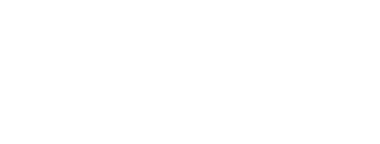

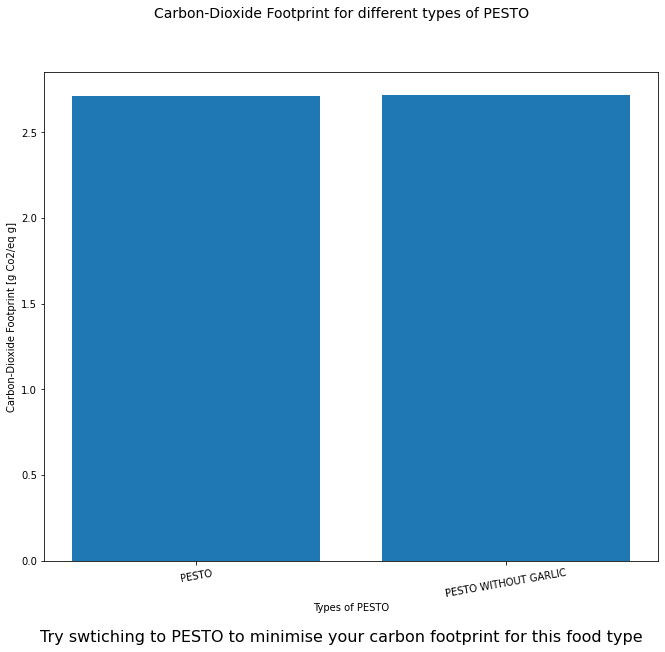

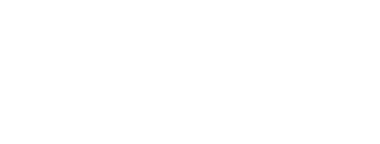

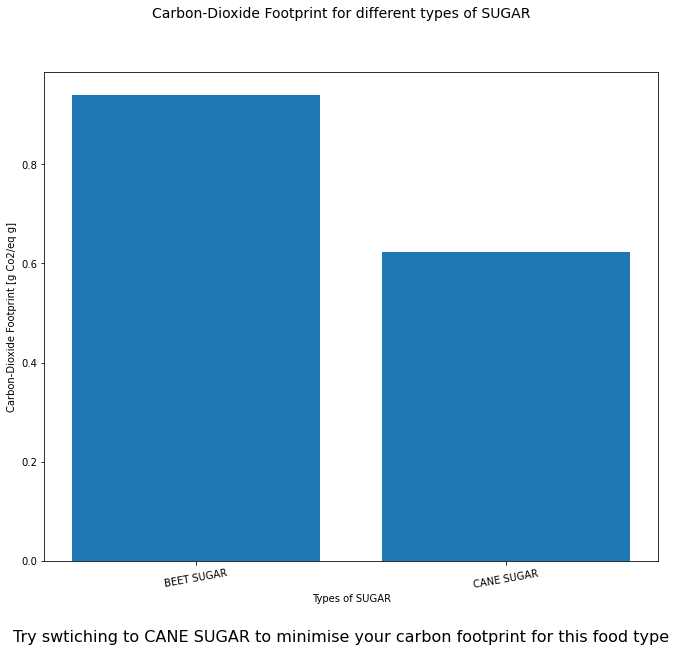

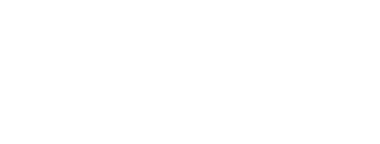

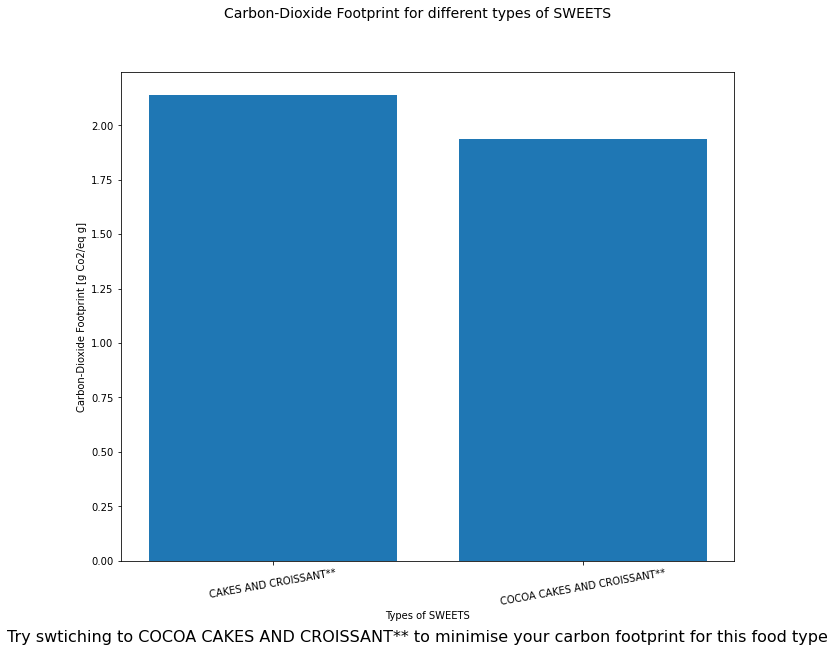

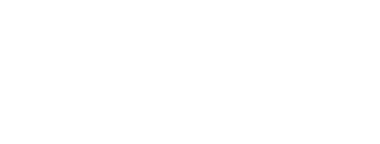

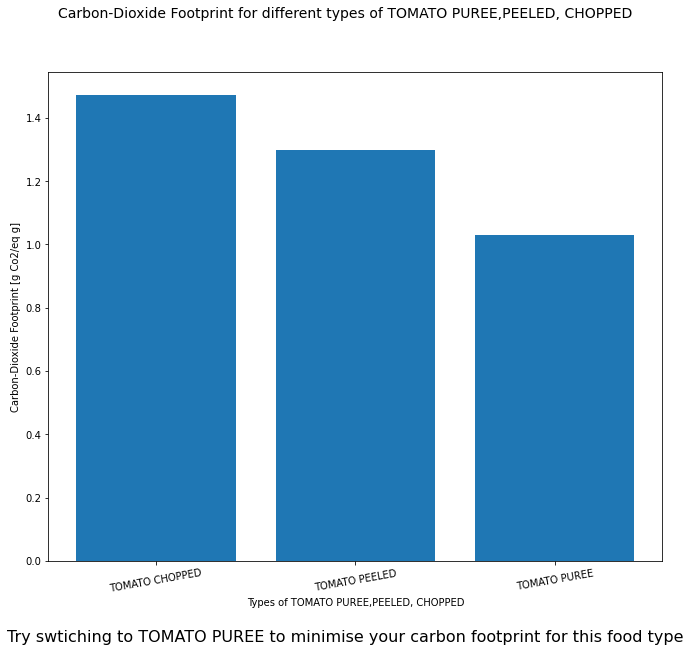

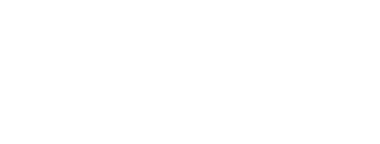

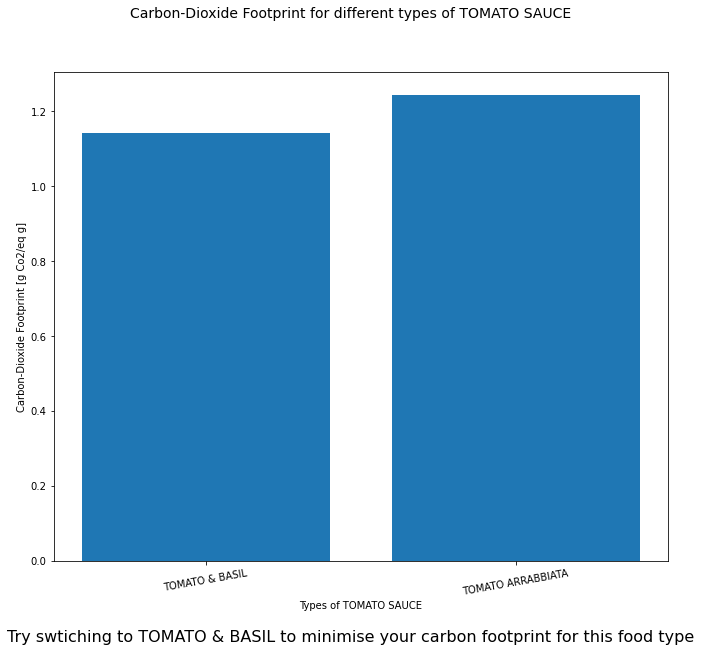

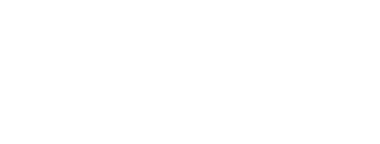

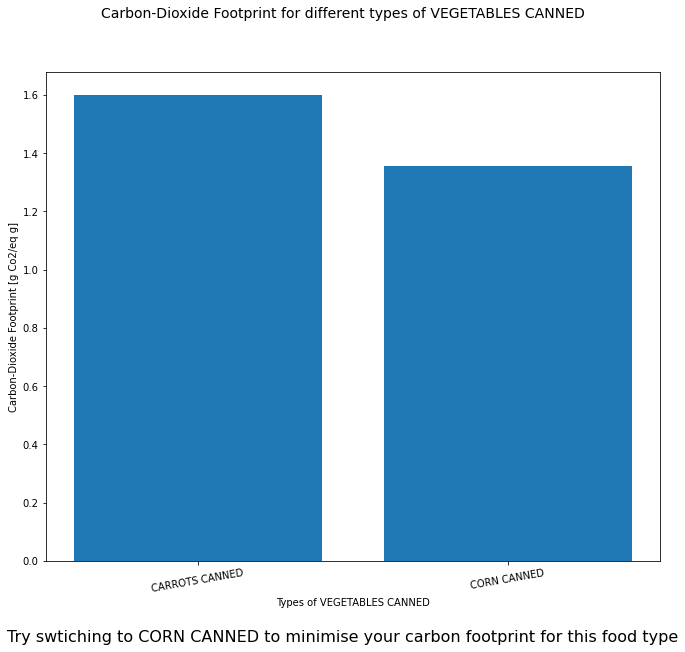

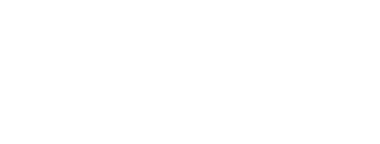

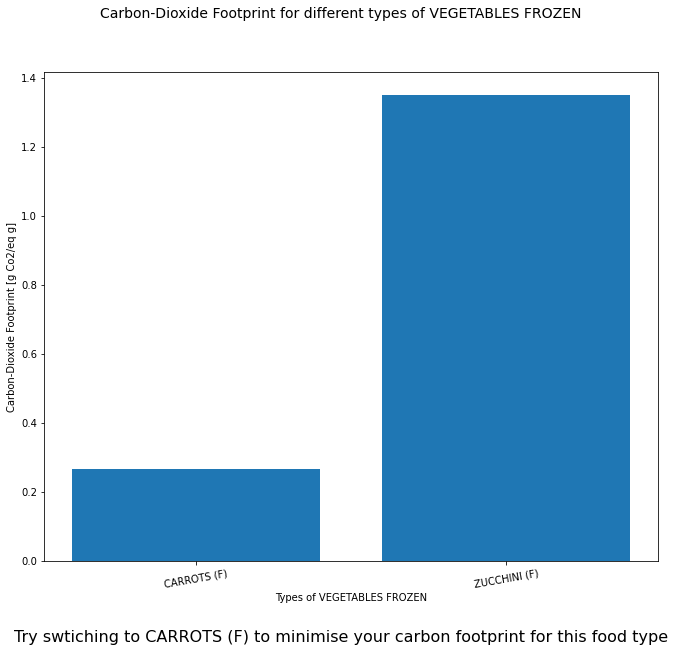

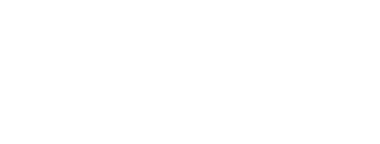

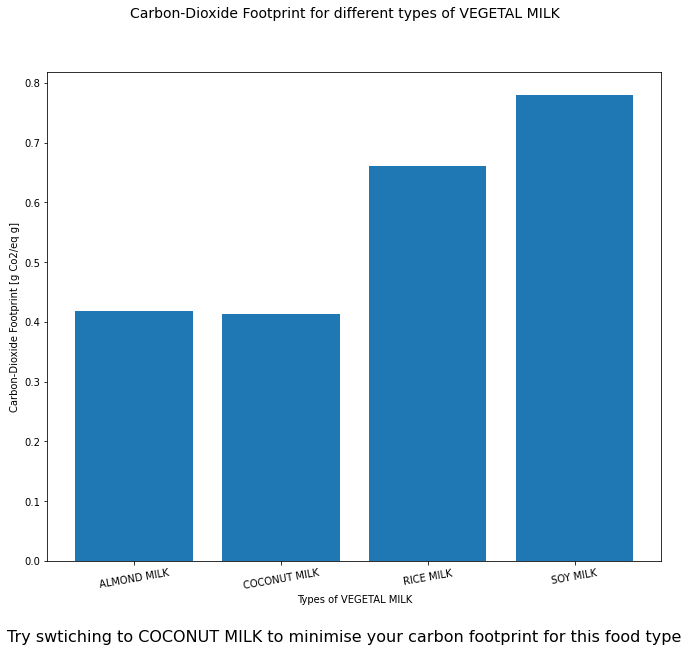

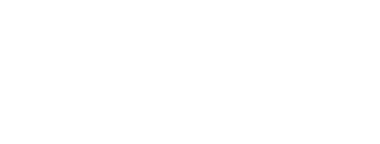

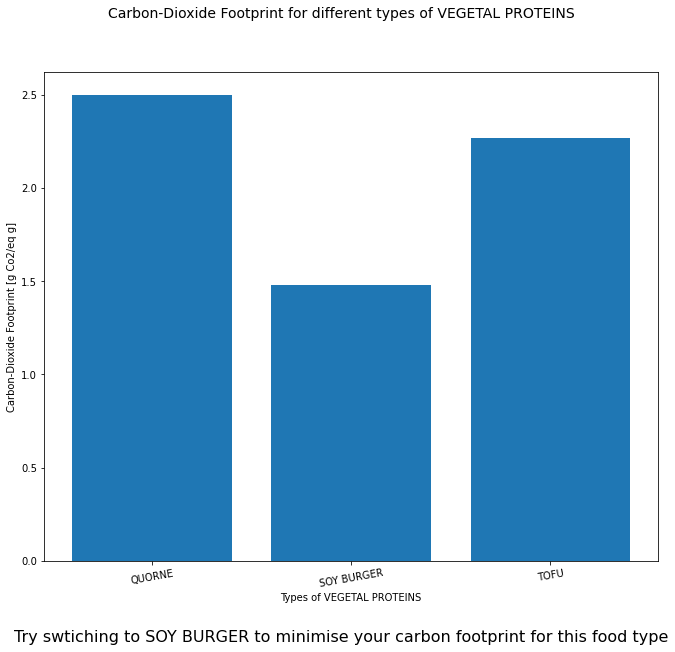

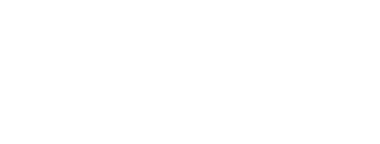

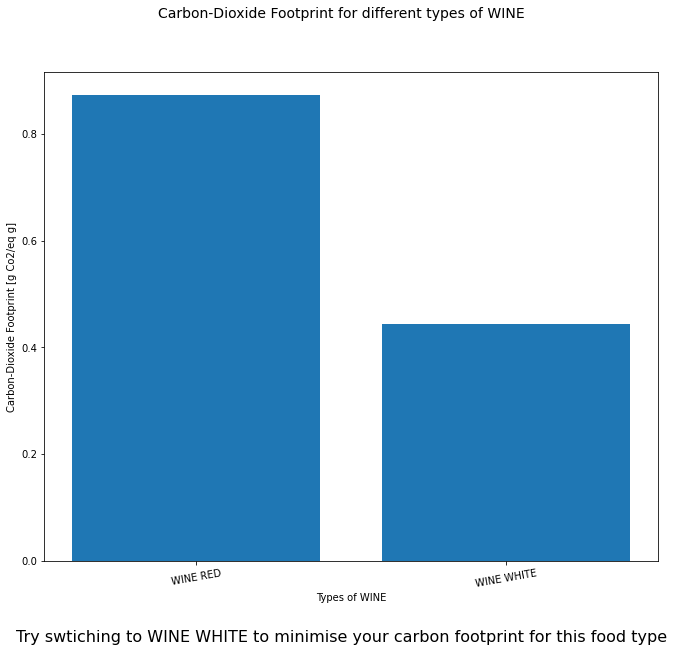

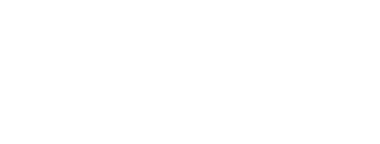

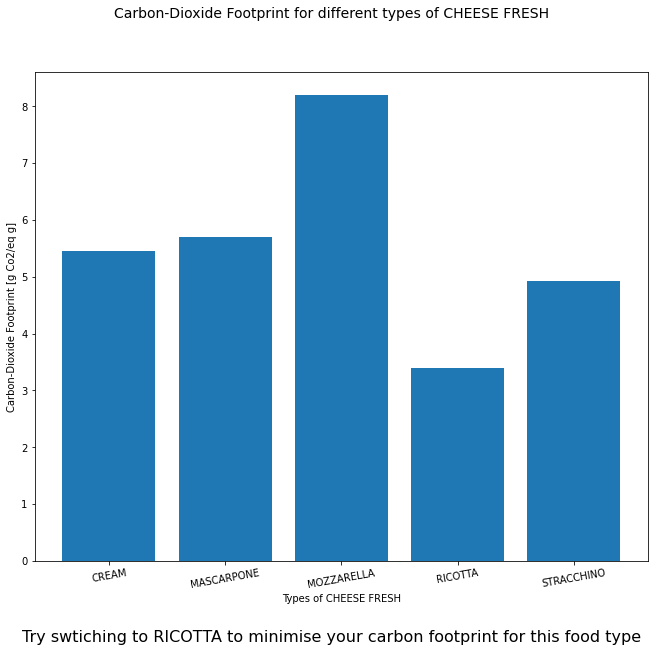

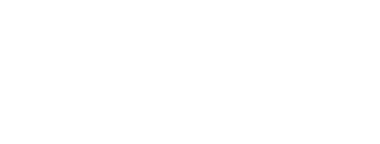

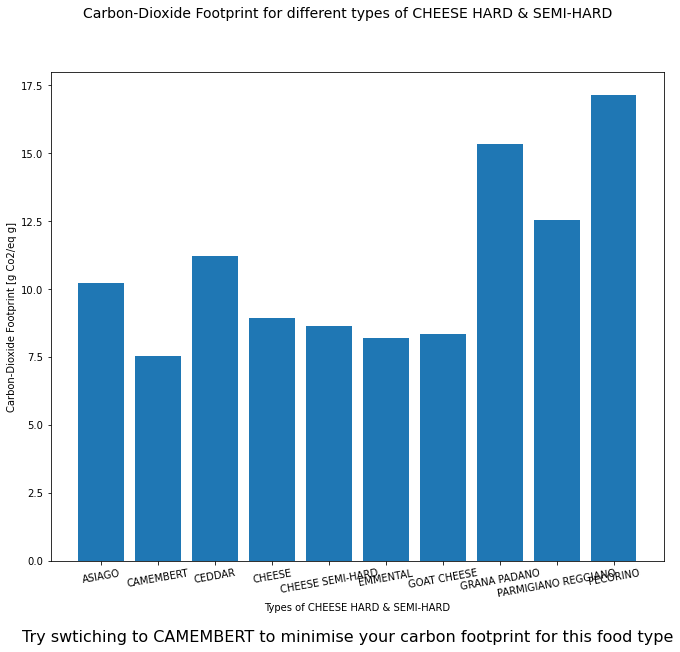

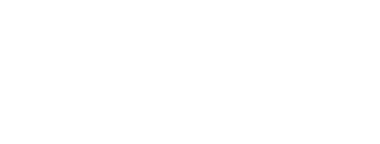

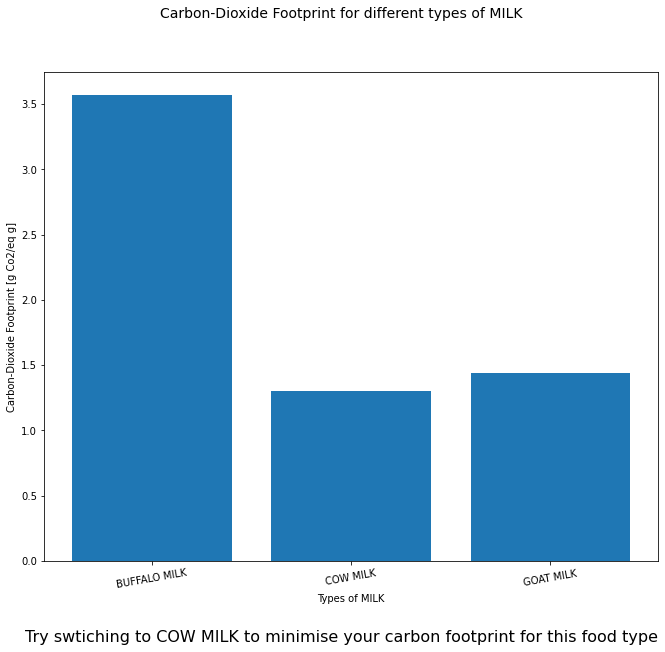

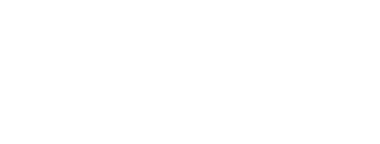

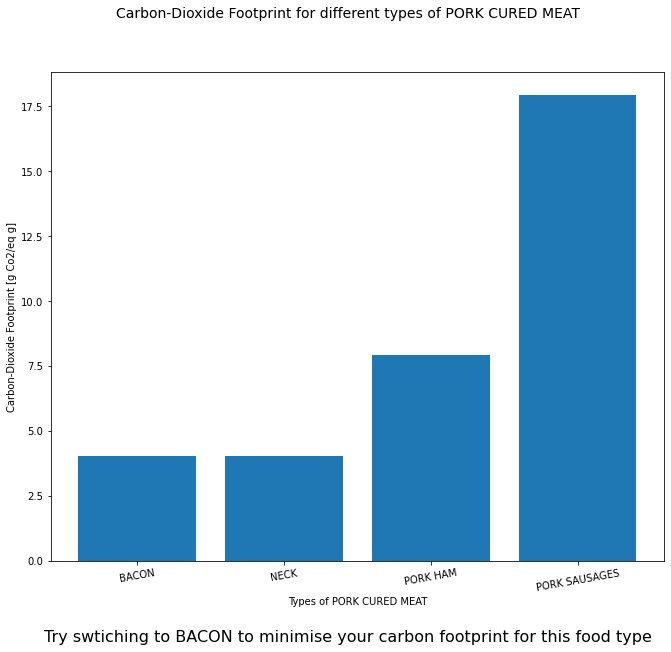

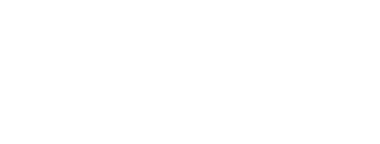

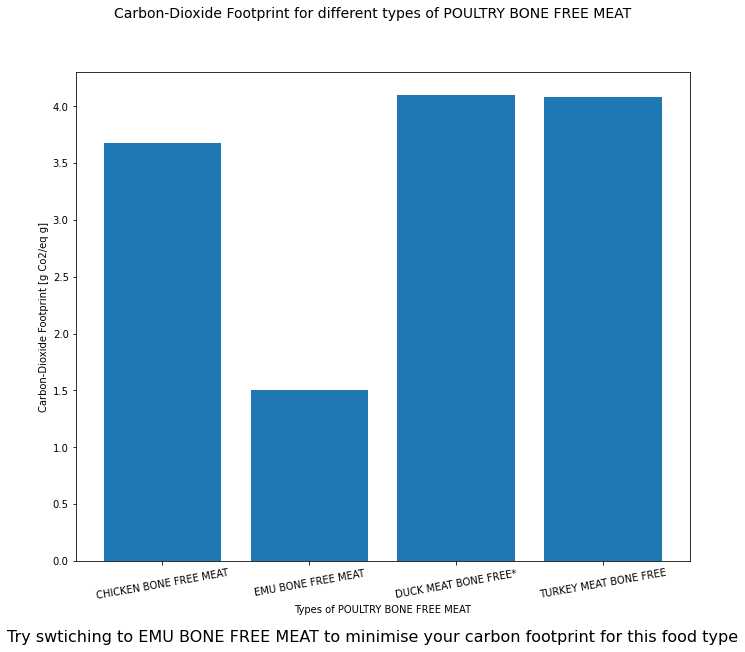

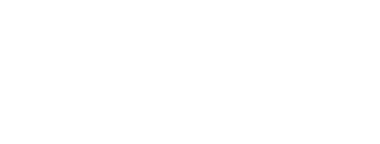

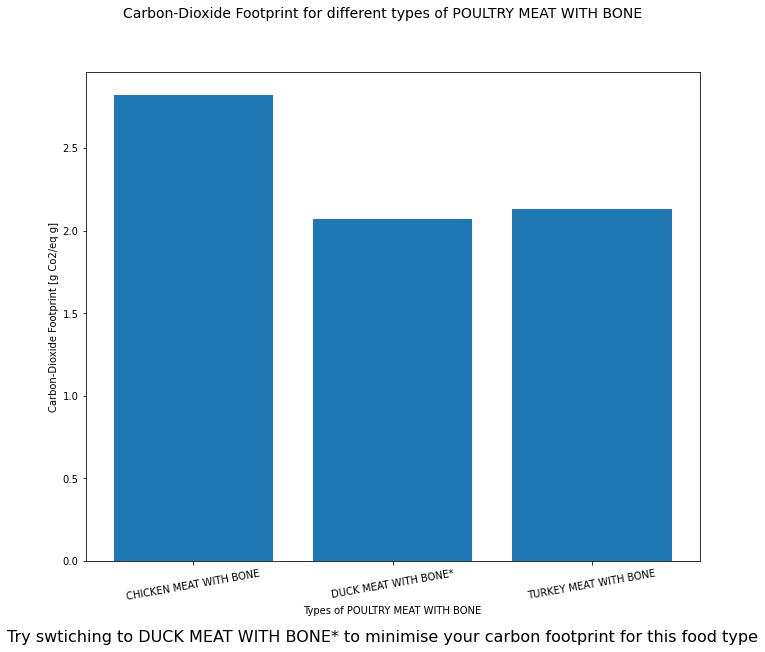

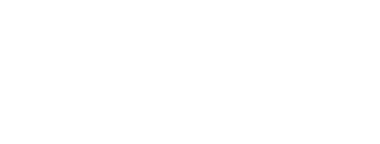

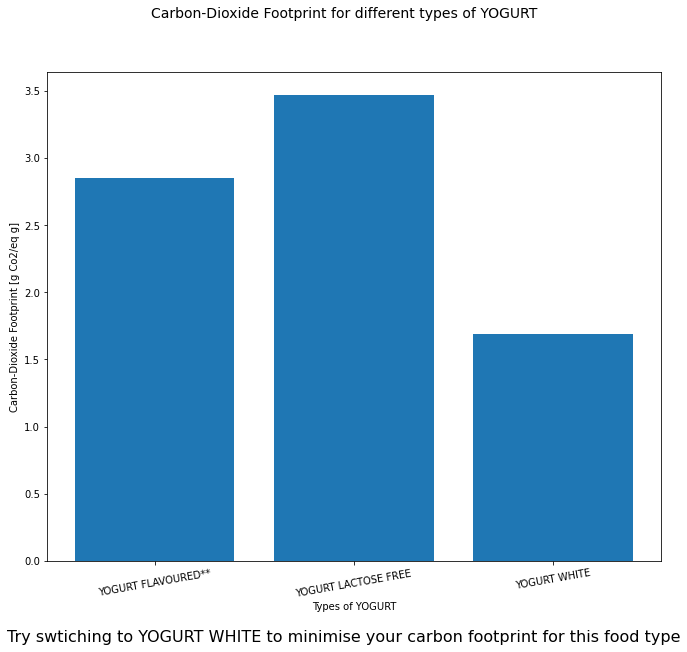

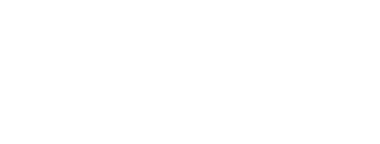

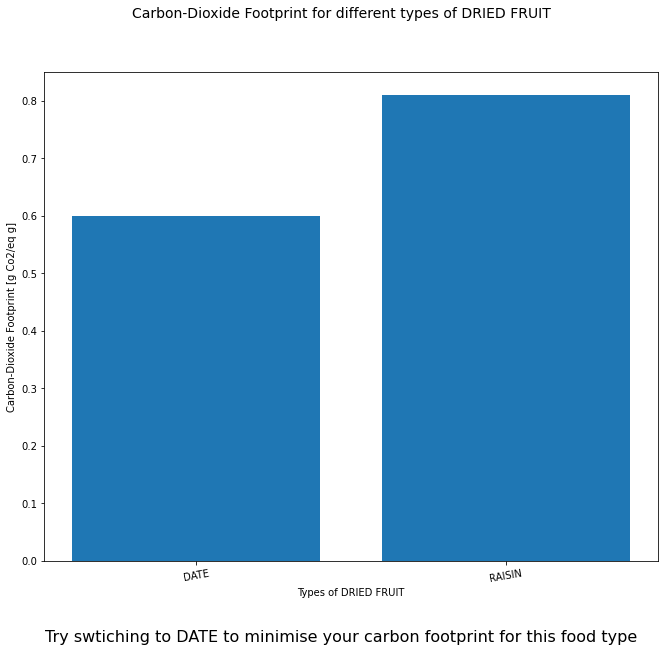

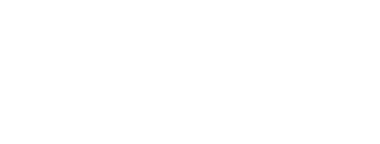

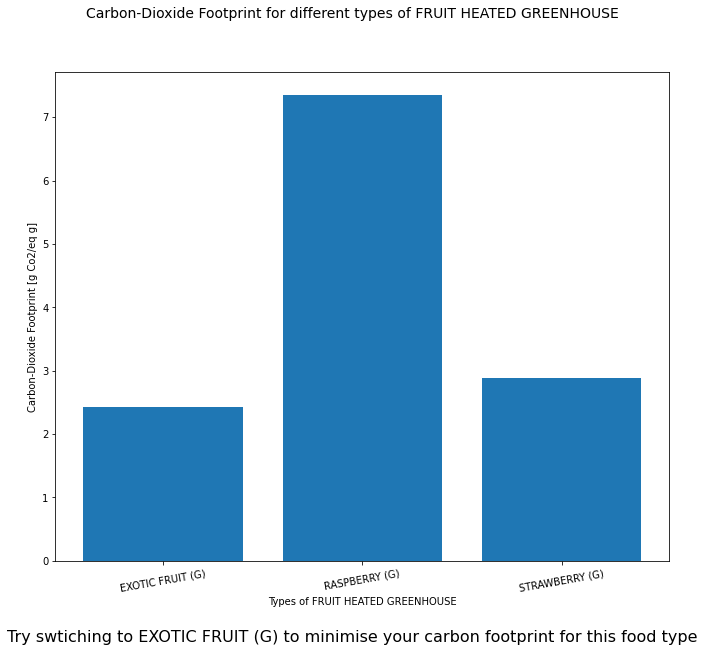

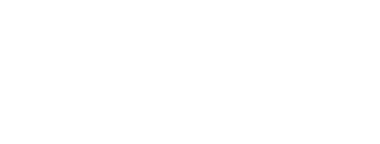

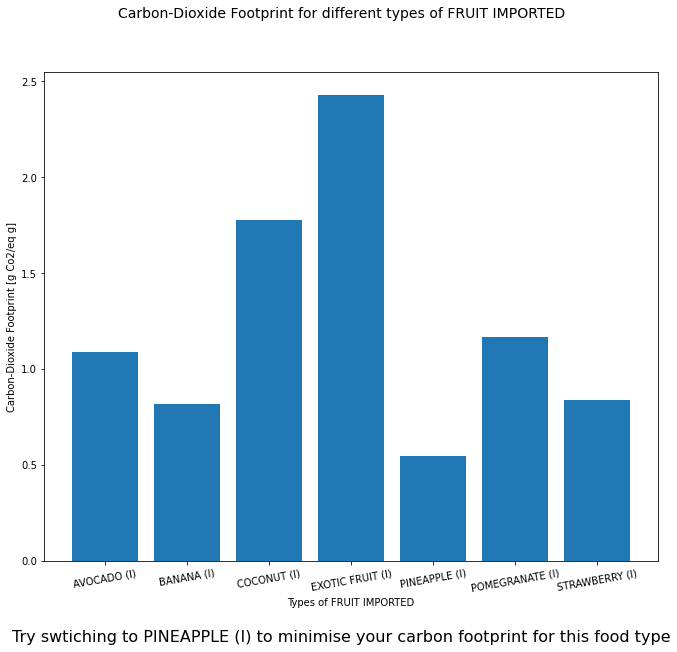

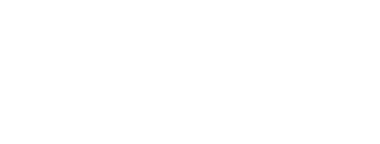

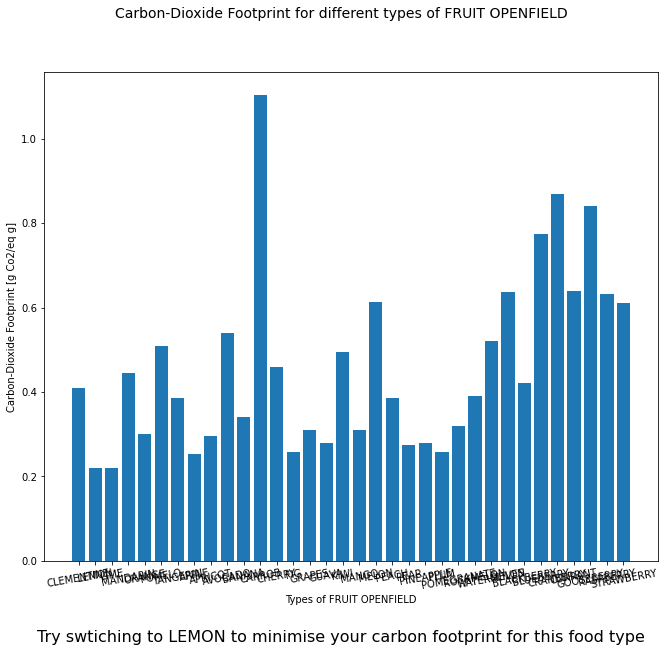

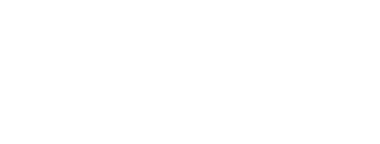

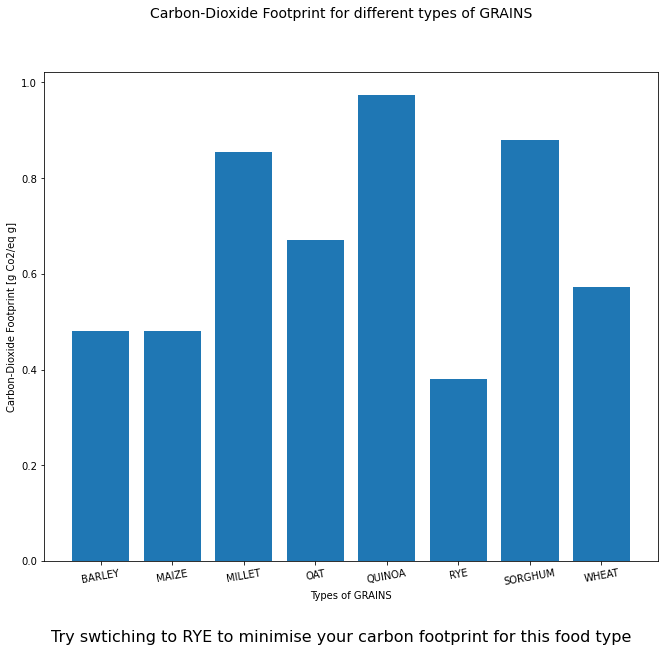

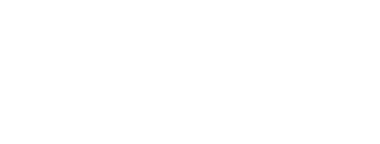

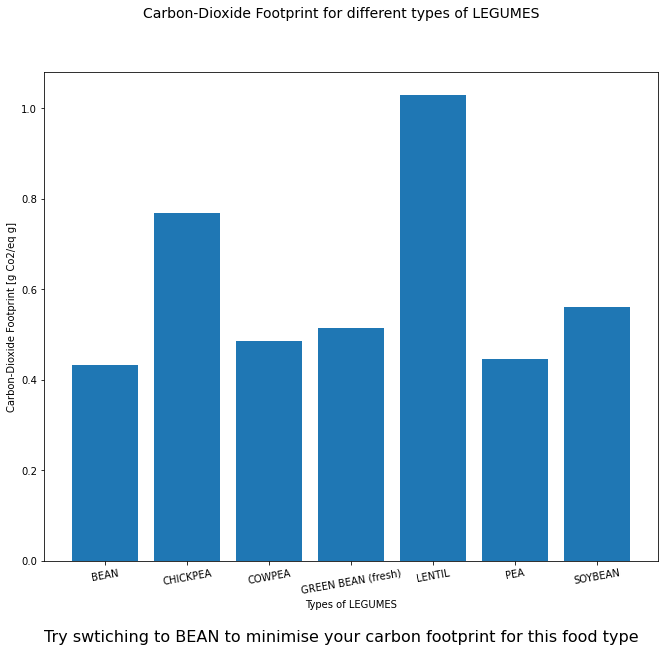

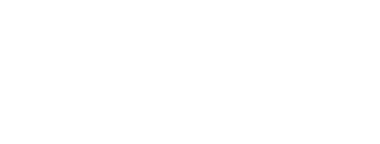

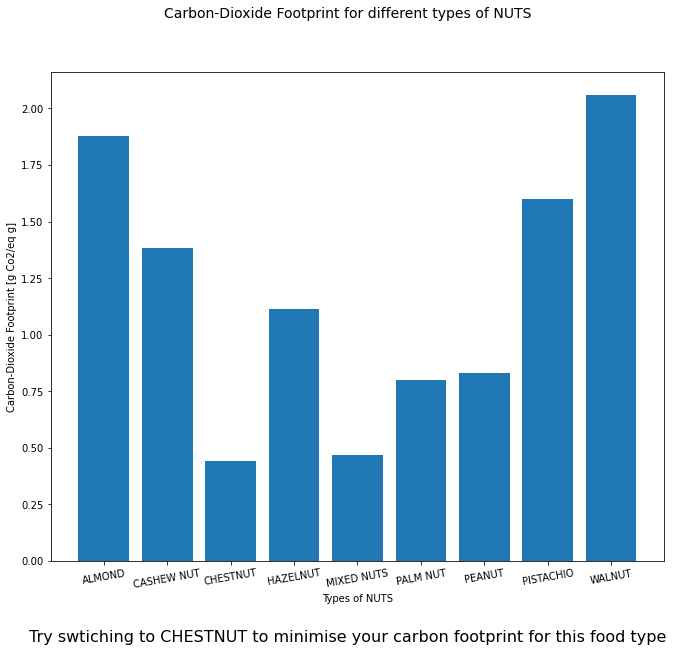

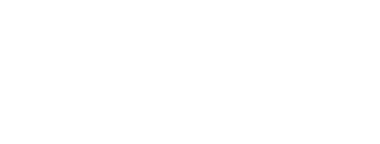

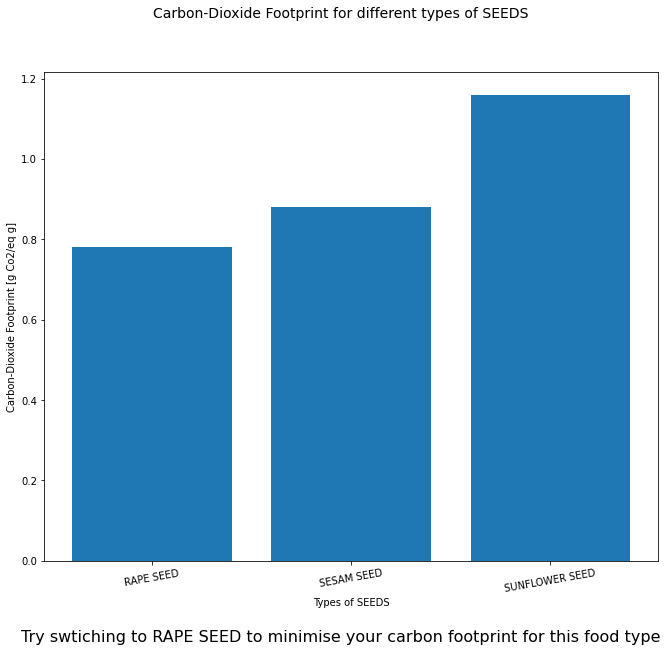

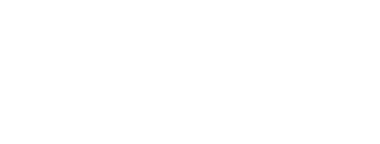

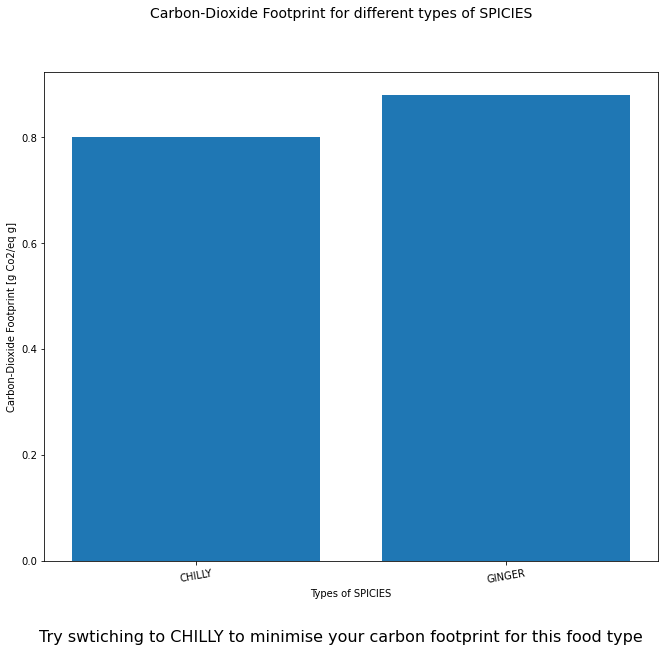

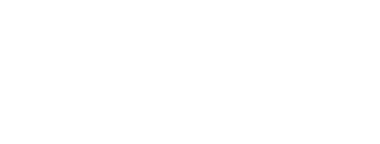

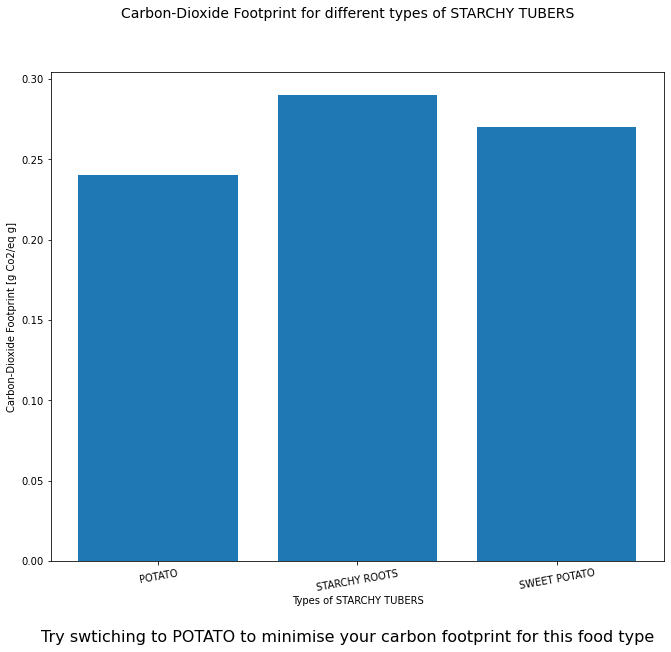

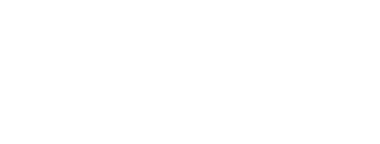

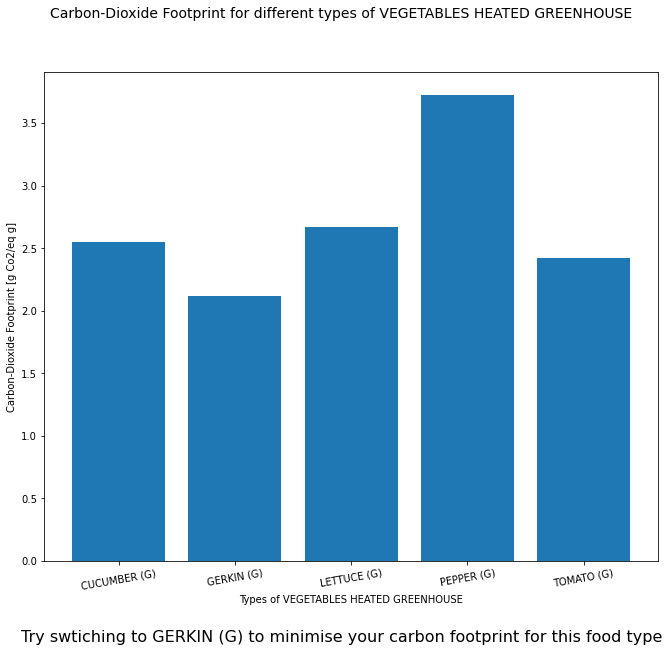

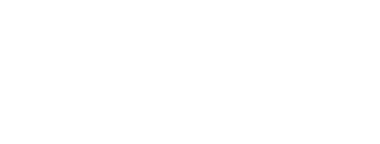

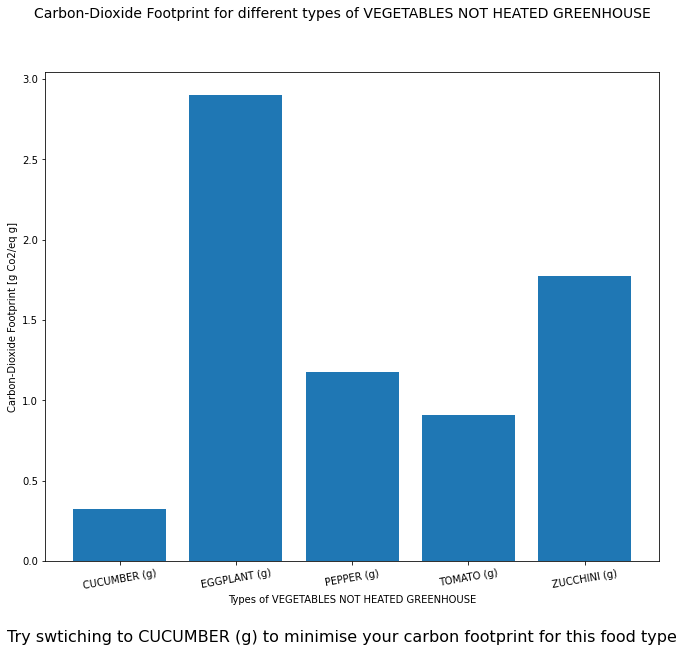

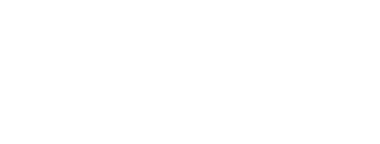

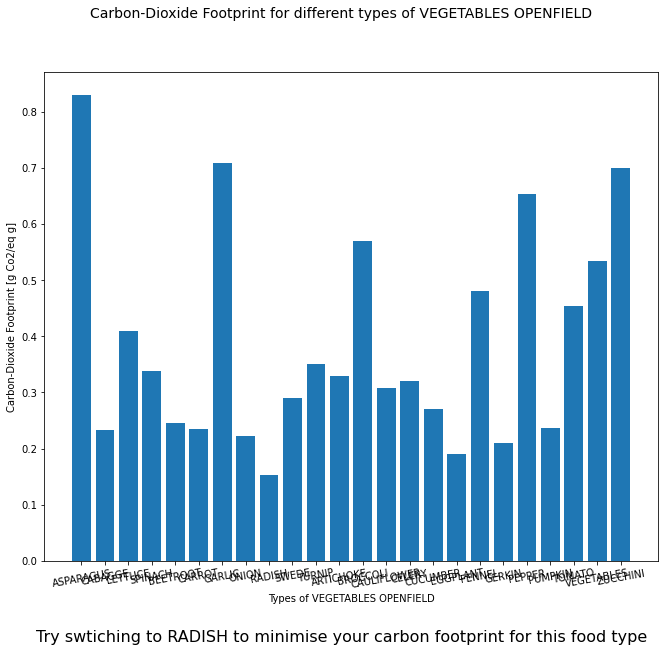

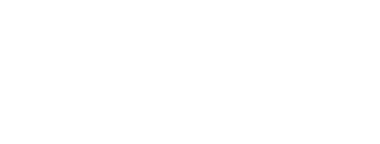

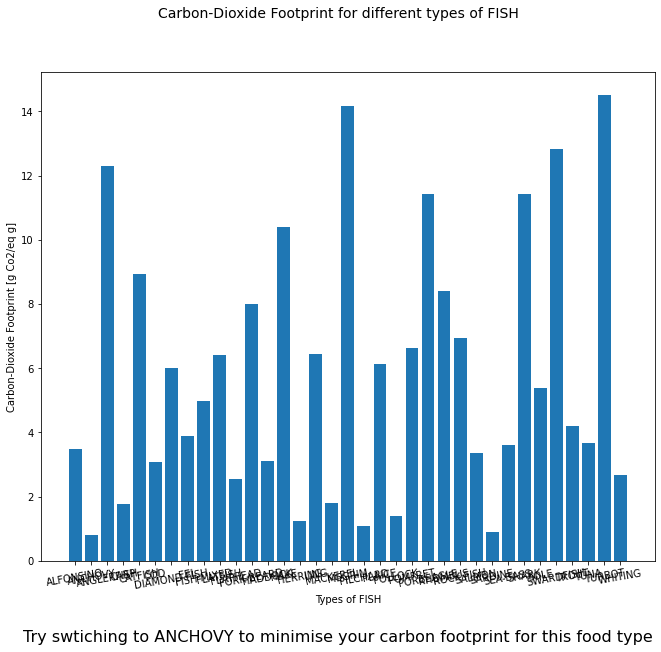

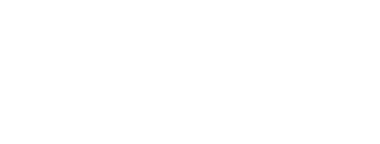

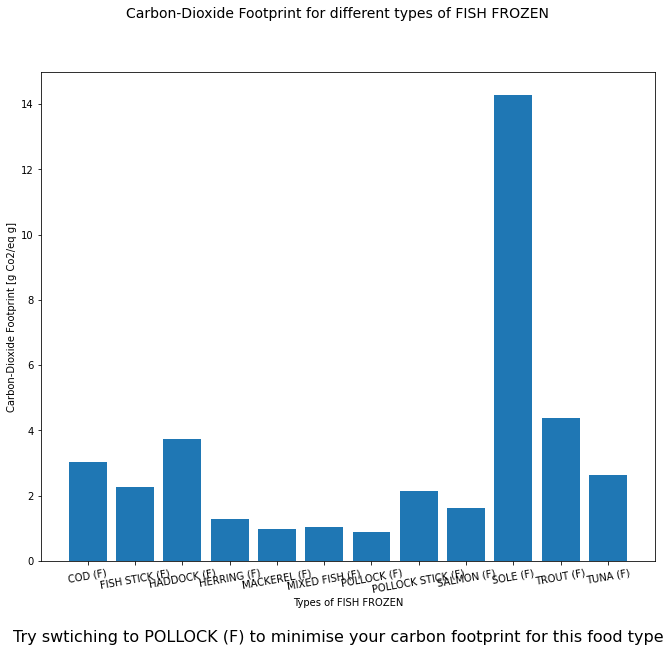

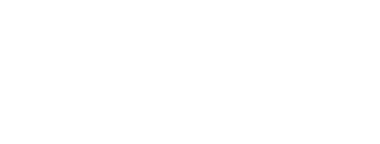

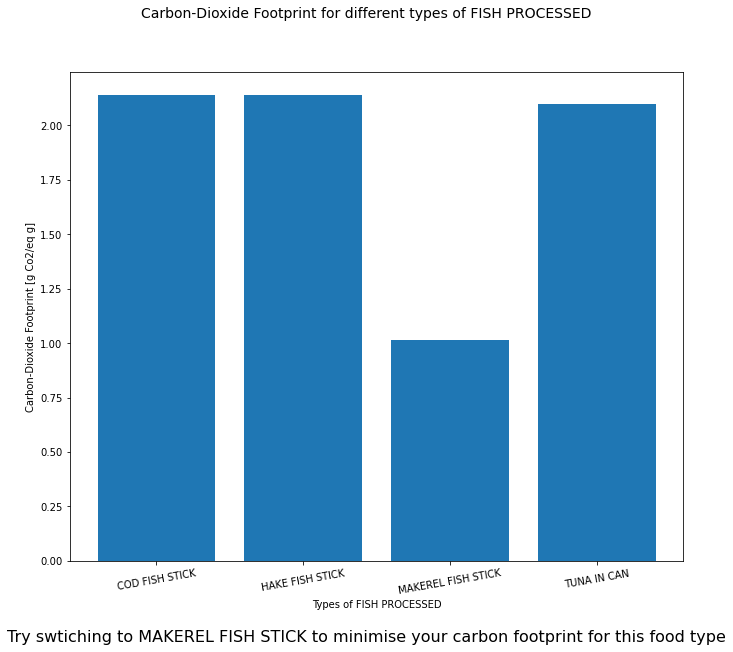

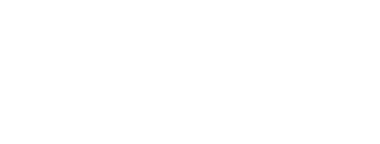

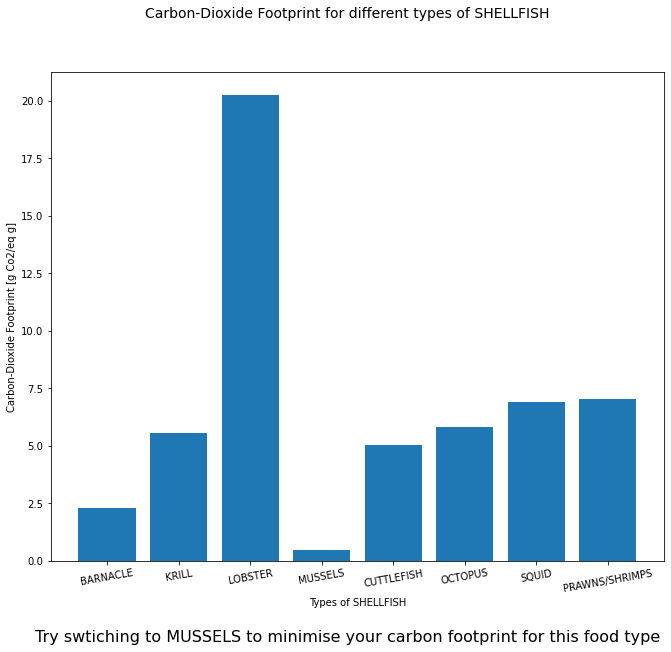

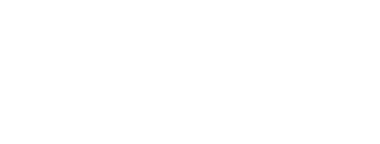

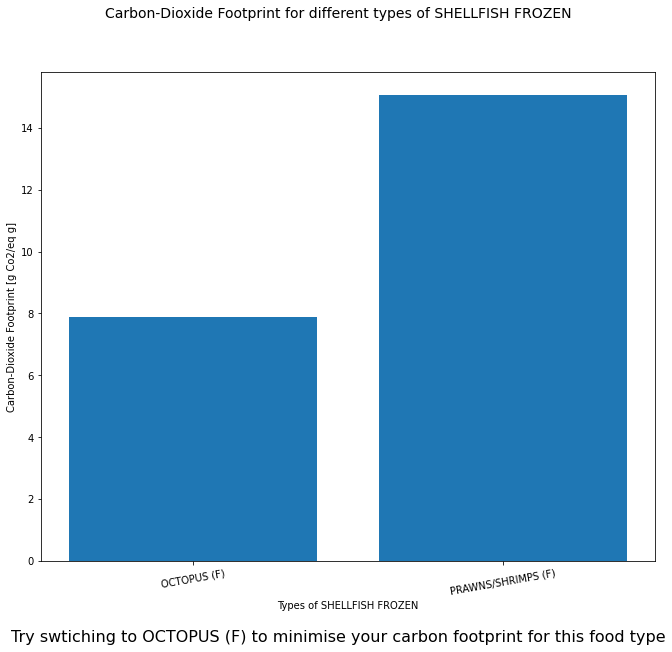

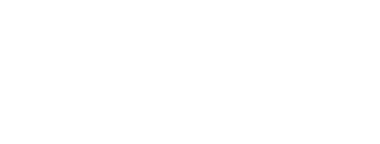

In [5]:

x= df['Food commodity TYPOLOGY']
for f in typologies:
    food_type = f
    y_category = []
    x_category = []
    index_count = -1
    
    for i in x: 
        index_count += 1
        if i == food_type:
            y_category.append(df['Carbon Footprint kg CO2eq/kg or l of food ITEM'].iloc[index_count])
            x_category.append(df['Food commodity ITEM'].iloc[index_count])
    
    
    
    if len(x_category) > 1: 
        lowest_index = 0
        lowest_category_carbon = 1000
        lowest_category_name = ''
        for n in y_category:
            if float(n) < float(lowest_category_carbon):
                lowest_category_carbon = float(n)
                lowest_category_name = x_category[lowest_index]
            lowest_index += 1

        txt = "Try swtiching to "+lowest_category_name+" to minimise your carbon footprint for this food type"
        print("")

        plt.figure(figsize=(11,9))

        plt.bar(x=x_category,height=y_category)
        plt.xticks(rotation=10)
        plt.suptitle('Carbon-Dioxide Footprint for different types of '+f,fontsize = 14)
        plt.ylabel('Carbon-Dioxide Footprint [g Co2/eq g]')
        plt.xlabel('Types of '+f)
        plt.figtext(0.5, 0.0001, txt, wrap=True, horizontalalignment='center', fontsize = 16)

        f,ax = plt.subplots()
        f.set_visible(False)
        f.set_figheight(2) 
    
   #print(y_category)
    #print(x_category)
    